In [1]:
"""
plot outputs of 13_CFScrossdataset.py
modified from: viscfsall_twentysix.ipynb

Shaina Lu
Zador & Gillis Labs
May 2020
"""

'\nplot outputs of 13_CFScrossdataset.py\nmodifie from: viscfsall_twentysix.ipynb\n\nShaina Lu\nZador & Gillis Labs\nMay 2020\n'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [3]:
#function for matplotlib formatting
def set_style():
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

# Read in data

In [4]:
#infiles
ST_FEATSETS = "/home/slu/spatial/data/cross_CFS/STtoABA_featsetsSTtrain_f1_all_CFS_052920.csv"
ST_TRAIN = "/home/slu/spatial/data/cross_CFS/STtoABA_STtrain_f1_all_CFS_052920.csv"
ST_TEST = "/home/slu/spatial/data/cross_CFS/STtoABA_STtest_f1_all_CFS_052920.csv"
STtoABA_ALL = "/home/slu/spatial/data/cross_CFS/STtoABA_ABAall_f1_all_CFS_052920.csv"

ABA_FEATSETS = "/home/slu/spatial/data/cross_CFS/ABAtoST_featsetsABAtrain_f1_all_CFS_052920.csv"
ABA_TRAIN = "/home/slu/spatial/data/cross_CFS/ABAtoST_ABAtrain_f1_all_CFS_052920.csv"
ABA_TEST = "/home/slu/spatial/data/cross_CFS/ABAtoST_ABAtest_f1_all_CFS_052920.csv"
ABAtoST_ALL = "/home/slu/spatial/data/cross_CFS/ABAtoST_STall_f1_all_CFS_052920.csv"

In [5]:
STfeatsets = pd.read_csv(ST_FEATSETS, sep=',', index_col=False)
STfeatsets.set_index(STfeatsets.columns, inplace=True)

STtrain = pd.read_csv(ST_TRAIN, sep=',', index_col=False)
STtrain.set_index(STtrain.columns, inplace=True)

STtest = pd.read_csv(ST_TEST, sep=',', index_col=False)
STtest.set_index(STtest.columns, inplace=True)

STtoABA = pd.read_csv(STtoABA_ALL, sep=',', index_col=False)
STtoABA.set_index(STtoABA.columns, inplace=True)

In [6]:
ABAfeatsets = pd.read_csv(ABA_FEATSETS, sep=',', index_col=False)
ABAfeatsets.set_index(ABAfeatsets.columns, inplace=True)

ABAtrain = pd.read_csv(ABA_TRAIN, sep=',', index_col=False)
ABAtrain.set_index(ABAtrain.columns, inplace=True)

ABAtest = pd.read_csv(ABA_TEST, sep=',', index_col=False)
ABAtest.set_index(ABAtest.columns, inplace=True)

ABAtoST = pd.read_csv(ABAtoST_ALL, sep=',', index_col=False)
ABAtoST.set_index(ABAtoST.columns, inplace=True)

convert dataframes to lists \
note: these cells are slow, up to a few mins

In [7]:
STtrain_new = pd.DataFrame(index=list(STtrain), columns=list(STtrain))
for i in range(STtrain.shape[0]):
    for j in range(i+1, STtrain.shape[1]):
        temp = STtrain.iloc[i,j].strip('[]')
        temp = np.fromstring(temp, dtype=float, sep=' ')
        STtrain_new.iloc[i,j] = temp

In [61]:
"""def formatfunc(cell):
    cell = cell.strip('')
    cell = np.fromstring(cell, dtype=float, sep=' ')
    return cell
    
STtest.applymap(lambda x: formatfunc(x))"""

In [8]:
STtest_new = pd.DataFrame(index=list(STtest), columns=list(STtest))
for i in range(STtest.shape[0]):
    for j in range(i+1, STtest.shape[1]):
        temp = STtest.iloc[i,j].strip('[]')
        temp = np.fromstring(temp, dtype=float, sep=' ')
        STtest_new.iloc[i,j] = temp

In [9]:
STtoABA_new = pd.DataFrame(index=list(STtoABA), columns=list(STtoABA))
for i in range(STtoABA.shape[0]):
    for j in range(i+1, STtoABA.shape[1]):
        temp = STtoABA.iloc[i,j].strip('[]')
        temp = np.fromstring(temp, dtype=float, sep=' ')
        STtoABA_new.iloc[i,j] = temp

In [10]:
ABAtrain_new = pd.DataFrame(index=list(ABAtrain), columns=list(ABAtrain))
for i in range(ABAtrain.shape[0]):
    for j in range(i+1, ABAtrain.shape[1]):
        temp = ABAtrain.iloc[i,j].strip('[]')
        temp = np.fromstring(temp, dtype=float, sep=' ')
        ABAtrain_new.iloc[i,j] = temp

In [11]:
ABAtest_new = pd.DataFrame(index=list(ABAtest), columns=list(ABAtest))
for i in range(ABAtest.shape[0]):
    for j in range(i+1, ABAtest.shape[1]):
        temp = ABAtest.iloc[i,j].strip('[]')
        temp = np.fromstring(temp, dtype=float, sep=' ')
        ABAtest_new.iloc[i,j] = temp

In [12]:
ABAtoST_new = pd.DataFrame(index=list(ABAtoST), columns=list(ABAtoST))
for i in range(ABAtoST.shape[0]):
    for j in range(i+1, ABAtoST.shape[1]):
        temp = ABAtoST.iloc[i,j].strip('[]')
        temp = np.fromstring(temp, dtype=float, sep=' ')
        ABAtoST_new.iloc[i,j] = temp

# ST to ABA

Try looking at max performing CFS set from train

In [104]:
# get index of max AUROC from train set; note gets first of ties in max
STmaxindex = pd.DataFrame(index=list(STtrain_new), columns=list(STtrain_new))
STtrain_max = pd.DataFrame(index=list(STtrain_new), columns=list(STtrain_new))
STtest_max = pd.DataFrame(index=list(STtest_new), columns=list(STtest_new))
STtoABA_max = pd.DataFrame(index=list(STtoABA_new), columns=list(STtoABA_new))
for i in range(STtrain_new.shape[0]):
    for j in range(i+1, STtrain_new.shape[1]):
        currmaxidx = np.argmax(STtrain_new.iloc[i,j])
        STmaxindex.iloc[i,j] = currmaxidx
        STtrain_max.iloc[i,j] = STtrain_new.iloc[i,j][currmaxidx]
        STtest_max.iloc[i,j] = STtest_new.iloc[i,j][currmaxidx]
        STtoABA_max.iloc[i,j] = STtoABA_new.iloc[i,j][currmaxidx]

In [110]:
#save to csv to avoid above parsing in the future
STtrain_max.to_csv("STtrain_max.csv")
STtest_max.to_csv("STtest_max.csv")
STtoABA_max.to_csv("STtoABA_max.csv")

In [10]:
#start here for subsequent runs
STtrain_max = pd.read_csv("/home/slu/spatial/data/cross_CFS/STtrain_max.csv", index_col=0)
STtest_max = pd.read_csv("/home/slu/spatial/data/cross_CFS/STtest_max.csv", index_col=0)
STtoABA_max = pd.read_csv("/home/slu/spatial/data/cross_CFS/STtoABA_max.csv", index_col=0)

In [11]:
#means
print(np.mean(STtrain_max.values[np.triu_indices_from(STtrain_max, k=1)]))
print(np.mean(STtest_max.values[np.triu_indices_from(STtest_max, k=1)]))
print(np.mean(STtoABA_max.values[np.triu_indices_from(STtoABA_max, k=1)]))

0.9999198510908998
0.7649616929935217
0.7025438536129822


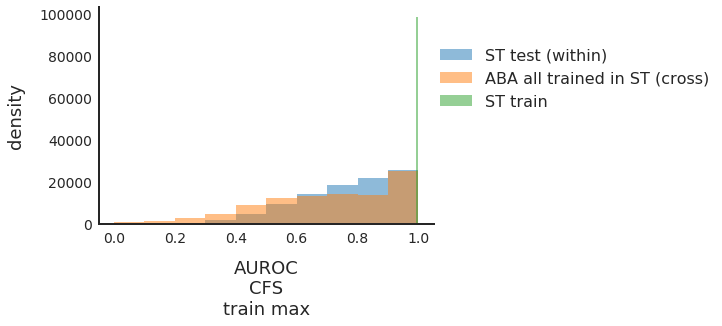

In [126]:
plt.hist(STtest_max.values[np.triu_indices_from(STtest_max, k=1)], alpha=0.5, label="ST test (within)")
plt.hist(STtoABA_max.values[np.triu_indices_from(STtoABA_max.values, k=1)], alpha=0.5, label="ABA all trained in ST (cross)")
plt.hist(STtrain_max.values[np.triu_indices_from(STtrain_max, k=1)], alpha=0.5, label="ST train")

plt.xlabel("AUROC\nCFS\ntrain max")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_1.pdf", bbox_inches='tight')
plt.show()

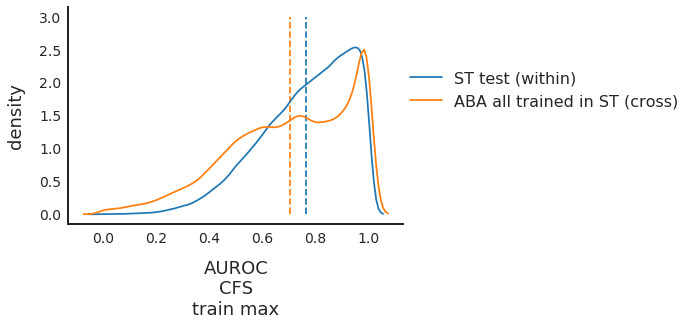

In [127]:
sns.kdeplot(STtest_max.values[np.triu_indices_from(STtest_max, k=1)], label="ST test (within)")
sns.kdeplot(STtoABA_max.values[np.triu_indices_from(STtoABA_max.values, k=1)], label="ABA all trained in ST (cross)")

#means
plt.vlines(x=np.mean(STtest_max.values[np.triu_indices_from(STtest_max, k=1)]), ymin=0, ymax=3, linestyles='--',colors='C0')
plt.vlines(x=np.mean(STtoABA_max.values[np.triu_indices_from(STtoABA_max, k=1)]), ymin=0, ymax=3, linestyles='--',colors='C1')

plt.xlabel("AUROC\nCFS\ntrain max")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

plt.savefig("060120_1.pdf", bbox_inches='tight')
plt.show()

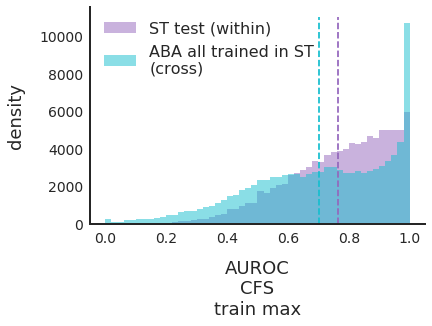

In [20]:
plt.hist(STtest_max.values[np.triu_indices_from(STtest_max, k=1)], alpha=0.5, bins=50, label="ST test (within)", color='C4')
plt.hist(STtoABA_max.values[np.triu_indices_from(STtoABA_max.values, k=1)], alpha=0.5, bins=50, label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(STtest_max.values[np.triu_indices_from(STtest_max, k=1)]), ymin=0, ymax=11000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(STtoABA_max.values[np.triu_indices_from(STtoABA_max, k=1)]), ymin=0, ymax=11000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nCFS\ntrain max")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

plt.savefig("062920_7.pdf", bbox_inches='tight')
plt.show()

What about looking at average AUROC across the 100 CFS sets

In [13]:
STtrain_avg = STtrain_new.applymap(lambda x: np.mean(x))
STtest_avg = STtest_new.applymap(lambda x: np.mean(x))
STtoABA_avg = STtoABA_new.applymap(lambda x: np.mean(x))

In [15]:
STtrain_avg.to_csv("/home/slu/spatial/data/cross_CFS/STtrain_avg.csv")
STtest_avg.to_csv("/home/slu/spatial/data/cross_CFS/STtest_avg.csv")
STtoABA_avg.to_csv("/home/slu/spatial/data/cross_CFS/STtoABA_avg.csv")

In [14]:
#means
print(np.mean(STtrain_avg.values[np.triu_indices_from(STtrain_avg, k=1)]))
print(np.mean(STtest_avg.values[np.triu_indices_from(STtest_avg, k=1)]))
print(np.mean(STtoABA_avg.values[np.triu_indices_from(STtoABA_avg, k=1)]))

0.9962495612555967
0.7620126288438677
0.6996477224732072


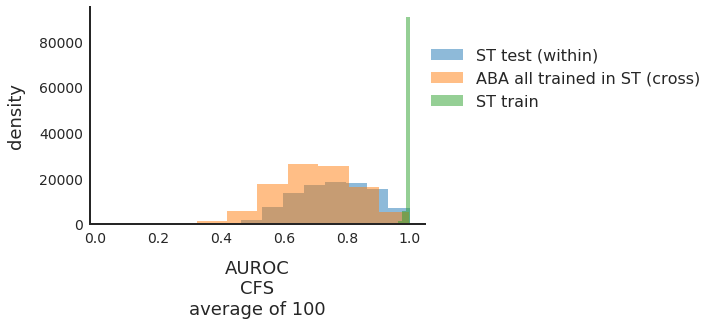

In [145]:
plt.hist(STtest_avg.values[np.triu_indices_from(STtest_avg, k=1)], alpha=0.5, label="ST test (within)")
plt.hist(STtoABA_avg.values[np.triu_indices_from(STtoABA_avg.values, k=1)], alpha=0.5, label="ABA all trained in ST (cross)")
plt.hist(STtrain_avg.values[np.triu_indices_from(STtrain_avg, k=1)], alpha=0.5, label="ST train")

plt.xlabel("AUROC\nCFS\naverage of 100")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_1.pdf", bbox_inches='tight')
plt.show()

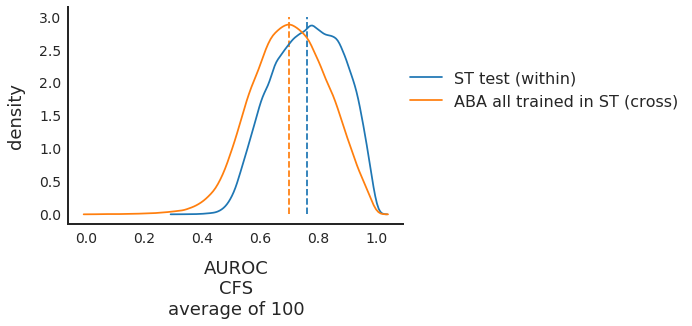

In [146]:
sns.kdeplot(STtest_avg.values[np.triu_indices_from(STtest_avg, k=1)], label="ST test (within)")
sns.kdeplot(STtoABA_avg.values[np.triu_indices_from(STtoABA_avg.values, k=1)], label="ABA all trained in ST (cross)")

#means
plt.vlines(x=np.mean(STtest_avg.values[np.triu_indices_from(STtest_avg, k=1)]), ymin=0, ymax=3, linestyles='--',colors='C0')
plt.vlines(x=np.mean(STtoABA_avg.values[np.triu_indices_from(STtoABA_avg, k=1)]), ymin=0, ymax=3, linestyles='--',colors='C1')

plt.xlabel("AUROC\nCFS\naverage of 100")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

plt.savefig("060120_5.pdf", bbox_inches='tight')
plt.show()

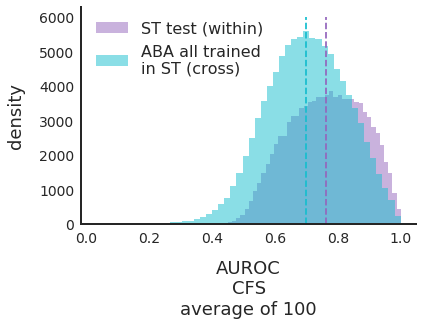

In [19]:
plt.hist(STtest_avg.values[np.triu_indices_from(STtest_avg, k=1)], alpha=0.5, bins=50, label="ST test (within)", color='C4')
plt.hist(STtoABA_avg.values[np.triu_indices_from(STtoABA_avg.values, k=1)], bins=50, alpha=0.5, label="ABA all trained\nin ST (cross)", color='C9')

#means
plt.vlines(x=np.mean(STtest_avg.values[np.triu_indices_from(STtest_avg, k=1)]), ymin=0, ymax=6000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(STtoABA_avg.values[np.triu_indices_from(STtoABA_avg, k=1)]), ymin=0, ymax=6000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nCFS\naverage of 100")
plt.ylabel("density")
plt.legend(loc="upper left")#loc=[1.0,0.5])

plt.savefig("063020_1.pdf", bbox_inches='tight')
plt.show()

# ABA to ST

In [ ]:
# get index of max AUROC from train set; note gets first of ties in max
ABAmaxindex = pd.DataFrame(index=list(ABAtrain_new), columns=list(ABAtrain_new))
ABAtrain_max = pd.DataFrame(index=list(ABAtrain_new), columns=list(ABAtrain_new))
ABAtest_max = pd.DataFrame(index=list(ABAtest_new), columns=list(ABAtest_new))
ABAtoST_max = pd.DataFrame(index=list(ABAtoST_new), columns=list(ABAtoST_new))
for i in range(ABAtrain_new.shape[0]):
    for j in range(i+1, ABAtrain_new.shape[1]):
        currmaxidx = np.argmax(ABAtrain_new.iloc[i,j])
        ABAmaxindex.iloc[i,j] = currmaxidx
        ABAtrain_max.iloc[i,j] = ABAtrain_new.iloc[i,j][currmaxidx]
        ABAtest_max.iloc[i,j] = ABAtest_new.iloc[i,j][currmaxidx]
        ABAtoST_max.iloc[i,j] = ABAtoST_new.iloc[i,j][currmaxidx]

In [112]:
#save to csv to avoid above parsing in the future
ABAtrain_max.to_csv("ABAtrain_max.csv")
ABAtest_max.to_csv("ABAtest_max.csv")
ABAtoST_max.to_csv("ABAtoST_max.csv")

In [14]:
#start here for subsequent runs
ABAtrain_max = pd.read_csv("/home/slu/spatial/data/cross_CFS/ABAtrain_max.csv", index_col=0)
ABAtest_max = pd.read_csv("/home/slu/spatial/data/cross_CFS/ABAtest_max.csv", index_col=0)
ABAtoST_max = pd.read_csv("/home/slu/spatial/data/cross_CFS/ABAtoST_max.csv", index_col=0)

In [15]:
#means
print(np.mean(ABAtrain_max.values[np.triu_indices_from(ABAtrain_max, k=1)]))
print(np.mean(ABAtest_max.values[np.triu_indices_from(ABAtest_max, k=1)]))
print(np.mean(ABAtoST_max.values[np.triu_indices_from(ABAtoST_max, k=1)]))

0.998780787977427
0.9847425390566856
0.6067225382458953


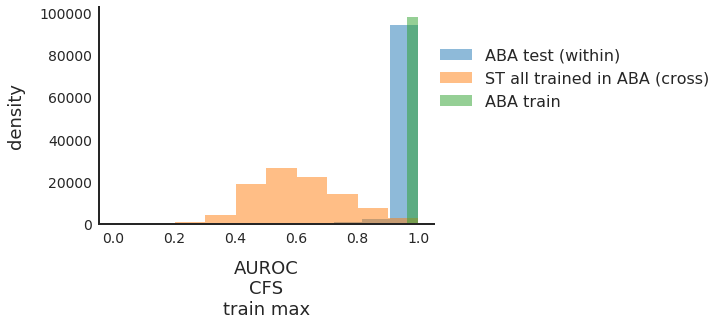

In [129]:
plt.hist(ABAtest_max.values[np.triu_indices_from(ABAtest_max, k=1)], alpha=0.5, label="ABA test (within)")
plt.hist(ABAtoST_max.values[np.triu_indices_from(ABAtoST_max.values, k=1)], alpha=0.5, label="ST all trained in ABA (cross)")
plt.hist(ABAtrain_max.values[np.triu_indices_from(ABAtrain_max, k=1)], alpha=0.5, label="ABA train")

plt.xlabel("AUROC\nCFS\ntrain max")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_1.pdf", bbox_inches='tight')
plt.show()

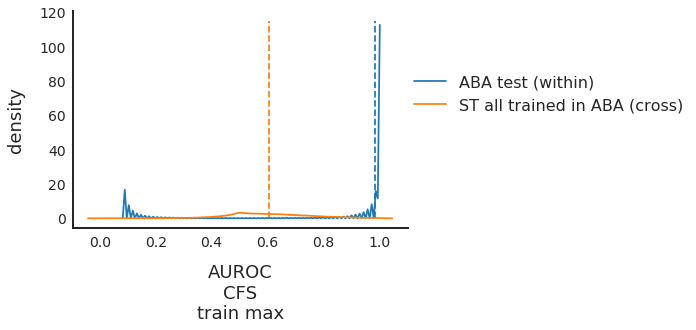

In [131]:
sns.kdeplot(ABAtest_max.values[np.triu_indices_from(ABAtest_max, k=1)], label="ABA test (within)")
sns.kdeplot(ABAtoST_max.values[np.triu_indices_from(ABAtoST_max.values, k=1)], label="ST all trained in ABA (cross)")

#means
plt.vlines(x=np.mean(ABAtest_max.values[np.triu_indices_from(ABAtest_max, k=1)]), ymin=0, ymax=115, linestyles='--',colors='C0')
plt.vlines(x=np.mean(ABAtoST_max.values[np.triu_indices_from(ABAtoST_max, k=1)]), ymin=0, ymax=115, linestyles='--',colors='C1')

plt.xlabel("AUROC\nCFS\ntrain max")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

plt.savefig("060120_2.pdf", bbox_inches='tight')
plt.show()

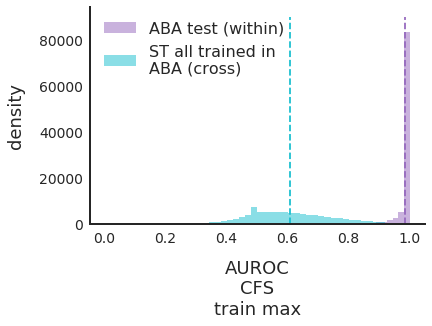

In [19]:
#kde plot looks wonky so try hist
plt.hist(ABAtest_max.values[np.triu_indices_from(ABAtest_max, k=1)], alpha=0.5, bins=50, label="ABA test (within)", color='C4')
plt.hist(ABAtoST_max.values[np.triu_indices_from(ABAtoST_max.values, k=1)], alpha=0.5, bins=50, label="ST all trained in\nABA (cross)", color='C9')

#means
plt.vlines(x=np.mean(ABAtest_max.values[np.triu_indices_from(ABAtest_max, k=1)]), ymin=0, ymax=90000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(ABAtoST_max.values[np.triu_indices_from(ABAtoST_max, k=1)]), ymin=0, ymax=90000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nCFS\ntrain max")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

plt.savefig("062920_8.pdf", bbox_inches='tight')
plt.show()

What about looking at average AUROC across the 100 CFS sets

In [20]:
ABAtrain_avg = ABAtrain_new.applymap(lambda x: np.mean(x))
ABAtest_avg = ABAtest_new.applymap(lambda x: np.mean(x))
ABAtoST_avg = ABAtoST_new.applymap(lambda x: np.mean(x))

In [21]:
ABAtrain.to_csv("/home/slu/spatial/data/cross_CFS/ABAtrain_avg.csv")
ABAtest.to_csv("/home/slu/spatial/data/cross_CFS/ABAtest_avg.csv")
ABAtoST.to_csv("/home/slu/spatial/data/cross_CFS/ABAtoST_avg.csv")

In [22]:
#means
print(np.mean(ABAtrain_avg.values[np.triu_indices_from(ABAtrain_avg, k=1)]))
print(np.mean(ABAtest_avg.values[np.triu_indices_from(ABAtest_avg, k=1)]))
print(np.mean(ABAtoST_avg.values[np.triu_indices_from(ABAtoST_avg, k=1)]))

0.9984675222522302
0.9831291342842089
0.6022978055829517


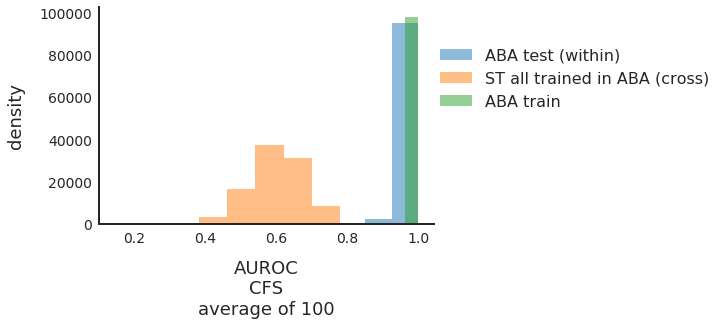

In [161]:
plt.hist(ABAtest_avg.values[np.triu_indices_from(ABAtest_avg, k=1)], alpha=0.5, label="ABA test (within)")
plt.hist(ABAtoST_avg.values[np.triu_indices_from(ABAtoST_avg.values, k=1)], alpha=0.5, label="ST all trained in ABA (cross)")
plt.hist(ABAtrain_avg.values[np.triu_indices_from(ABAtrain_avg, k=1)], alpha=0.5, label="ABA train")

plt.xlabel("AUROC\nCFS\naverage of 100")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

#plt.savefig("051920_1.pdf", bbox_inches='tight')
plt.show()

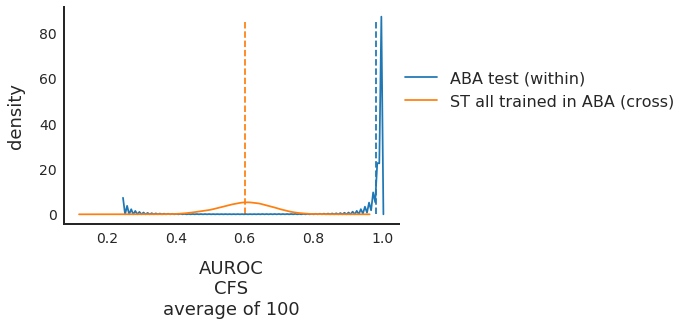

In [160]:
sns.kdeplot(ABAtest_avg.values[np.triu_indices_from(ABAtest_avg, k=1)], label="ABA test (within)")
sns.kdeplot(ABAtoST_avg.values[np.triu_indices_from(ABAtoST_avg.values, k=1)], label="ST all trained in ABA (cross)")

#means
plt.vlines(x=np.mean(ABAtest_avg.values[np.triu_indices_from(ABAtest_avg, k=1)]), ymin=0, ymax=85, linestyles='--',colors='C0')
plt.vlines(x=np.mean(ABAtoST_avg.values[np.triu_indices_from(ABAtoST_avg, k=1)]), ymin=0, ymax=85, linestyles='--',colors='C1')

plt.xlabel("AUROC\nCFS\naverage of 100")
plt.ylabel("density")
plt.legend(loc=[1.0,0.5])

plt.savefig("060120_6.pdf", bbox_inches='tight')
plt.show()

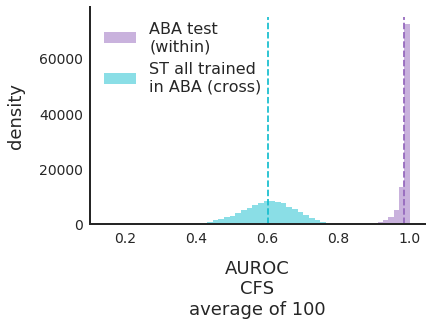

In [24]:
plt.hist(ABAtest_avg.values[np.triu_indices_from(ABAtest_avg, k=1)], alpha=0.5, bins=50, label="ABA test\n(within)", color='C4')
plt.hist(ABAtoST_avg.values[np.triu_indices_from(ABAtoST_avg.values, k=1)], alpha=0.5, bins=50, label="ST all trained\nin ABA (cross)", color='C9')

#means
plt.vlines(x=np.mean(ABAtest_avg.values[np.triu_indices_from(ABAtest_avg, k=1)]), ymin=0, ymax=75000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(ABAtoST_avg.values[np.triu_indices_from(ABAtoST_avg, k=1)]), ymin=0, ymax=75000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nCFS\naverage of 100")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

plt.savefig("063020_2.pdf", bbox_inches='tight')
plt.show()